In [6]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [7]:
df = pd.read_csv('heart.csv')

In [26]:
n_df = df[['age','sex','cp', 'trestbps','chol','fbs',
       'restecg','thalach', 'exang', 'oldpeak','slope','ca','thal']]
target = df['target']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(n_df,
                                                    target,
                                                    test_size=0.4)

In [37]:
tree_model = RandomForestClassifier()
tree_preds = tree_model.fit(X_train, y_train).predict(X_test)
tree_acc = accuracy_score(y_test, tree_preds)
print('LDA Accuracy: {}'.format(tree_acc))

LDA Accuracy: 0.9902439024390244


In [38]:
from sklearn.metrics import classification_report 
classification_report = classification_report(y_test, tree_preds)
print(classification_report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       199
           1       0.98      1.00      0.99       211

    accuracy                           0.99       410
   macro avg       0.99      0.99      0.99       410
weighted avg       0.99      0.99      0.99       410



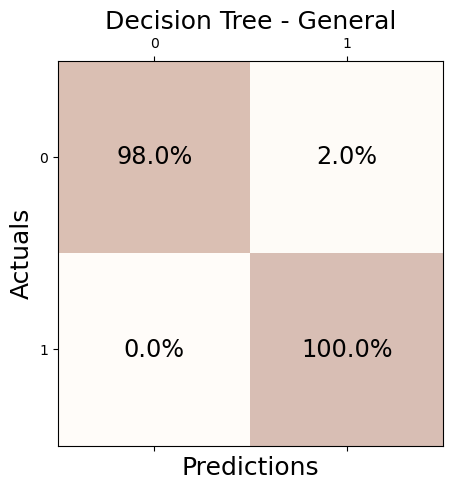

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_test, tree_preds.round(0).astype(int),normalize='true')
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=str(round(conf_matrix[i, j]*100,1))+'%', va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Decision Tree - General', fontsize=18)
plt.show()